In [1]:
cd /home/dongdong/SCR/MHC

/scratch/gpfs/dongdong/MHC


In [3]:
import numpy as np
rf=open('prot.list','r')
structure=['C','CH','H']
lines=rf.readlines()
for line in lines:
    line=line.strip()
    wf=open('%s_all.txt' %line,'w')
    alldict={}
    for ss in structure:
        name=line+'_'+ss+'.txt'
        temp=open(name,'r')
        allline=temp.readlines()[1:]
        for tt in allline:
            tt=tt.strip()
            infor=tt.split()
            name=infor[0].split('_')[0]
            score=infor[1]
            alldict[name]=[]
        temp.close()
    for ss in structure:
        name=line+'_'+ss+'.txt'
        temp=open(name,'r')
        allline=temp.readlines()[1:]            
        for tt in allline:
            tt=tt.strip()
            infor=tt.split()
            name=infor[0].split('_')[0]
            score=float(infor[1])
            alldict[name].append(score)
        temp.close()
    sdict={}
    for key in alldict:
        sscore=np.min(alldict[key])
        sdict[key]=sscore
    dict_ob=sorted(sdict.items(),key=lambda item:item[1])
    for aa in dict_ob:
        wf.write(aa[0]+'\t'+str(aa[1])+'\n')
    wf.close()

In [13]:
allele='A0101'
allelefile=open('9mer/HLA-%s'+r'%'+'2A%s'+r'%'+'3A%s.txt' %(allele[0],allele[1:3],allele[3:5]),'r')

TypeError: not all arguments converted during string formatting

In [16]:
aa='9mer/HLA-%s%2A%s3A%s.txt' %(allele[0],allele[1:3],allele[3:5])

In [37]:
def binna(x,thre):
    #thre=500
    if x <thre:
        return 1
    else:
        return 0

In [60]:
rf=open('prot_allele.list','r')
lines=rf.readlines()
for line in lines:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    wf=open('%s_roc.txt' %pdbid, 'w')
    wf2=open('%s_roc3.txt' %pdbid, 'w')
    allelefile=open('9mer/HLA-%s.txt' %allele,'r')
    exp_dict={}
    exp_line=allelefile.readlines()
    for tt in exp_line:
        tt=tt.strip()
        infor=tt.split()
        name=infor[0].split('_')[0].lower()
        binding=binna(float(infor[1]),500)
        exp_dict[name]=binding
    temp.close()
    #print(exp_dict)
    dockfile=open('%s_all.txt' %pdbid,'r')
    allscore=[]
    dock_line=dockfile.readlines()
    for dd in dock_line:
        dd = dd.strip()
        infor=dd.split()
        name=infor[0].split('_')[0]
        tempscore=-float(infor[1])
        allscore.append(tempscore)
    normalized = (allscore-np.min(allscore))/(np.max(allscore)-np.min(allscore))
    a=0
    for dd in dock_line:
        dd = dd.strip()
        infor=dd.split()
        name=infor[0].split('_')[0]
        wf.write(dd+'    '+str(normalized[a])+'    '+str(exp_dict[name])+'\n')
        wf2.write(str(normalized[a])+'    '+str(exp_dict[name])+'\n')
        a+=1
    wf.close()
    wf2.close()

In [27]:
cd /home/dongdong/SCR/MHC/rosetta14

/scratch/gpfs/dongdong/MHC/rosetta15


In [46]:
import numpy as np
import heapq
os.chdir('/home/dongdong/SCR/MHC/rosetta14')
rf=open('prot_allele.list','r')
lines=rf.readlines()
#lines=['3bo8 A0101']
num=30
ave_num=10
def binna(x,thre):
    #thre=500
    if x <=thre:
        return 1
    else:
        return 0
for line in lines[:4]:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    wf=open('%s%d_roc_all%d.txt' %(pdbid,num,ave_num), 'w')
    wf2=open('%s%d_roc%d.txt' %(pdbid,num,ave_num), 'w')
    allelefile=open('../9mer/HLA-%s.txt' %allele,'r')
    exp_dict={}
    exp_line=allelefile.readlines()
    for tt in exp_line:
        tt=tt.strip()
        infor=tt.split()
        name=infor[0].split('_')[0].lower()
        binding=binna(float(infor[1]),500)
        exp_dict[name]=binding

    #print(exp_dict)
    dockfile=open('l10_score%d_%s_low_score14.dat' %(num,pdbid),'r')
    dock_line=dockfile.readlines()
    alldict={}
    for line in dock_line:
        line=line.strip()
        infor=line.split()
        name=infor[0].split('_')[0]
        score=infor[1]
        alldict[name]=[]
    for line in dock_line:
        line=line.strip()
        infor=line.split()
        name=infor[0].split('_')[0]
        for ss in range(len(infor)-1):
            score=float(infor[ss+1])
            alldict[name].append(score)
    sdict={}
    for key in alldict:   
        sscore=np.mean(heapq.nsmallest(ave_num,alldict[key]))
        sdict[key]=sscore
    dict_ob=sorted(sdict.items(),key=lambda item:item[1])

    allscore=[]
    for dd in dict_ob:
        tempscore=-float(dd[1])
        allscore.append(tempscore)
    normalized = (allscore-np.min(allscore))/(np.max(allscore)-np.min(allscore))
    a=0
    for dd in dict_ob:
        wf.write(str(dd[0])+'    '+str(dd[1])+'    '+str(normalized[a])+'    '+str(exp_dict[dd[0]])+'\n')
        wf2.write(str(normalized[a])+'    '+str(exp_dict[dd[0]])+'\n')
        a+=1
    wf.close()
    wf2.close()

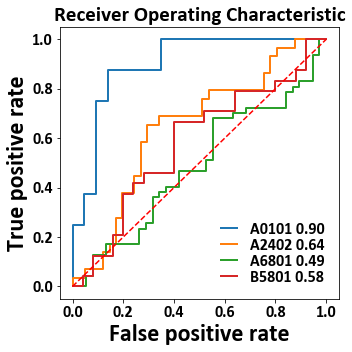

In [47]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
title_prop = font_manager.FontProperties(fname=font_path, size=21)
rf=open('prot_allele.list','r')
lines=rf.readlines()
#lines=['3bo8 A0101']
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(1,1,1)
for line in lines[:4]:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    data=np.loadtxt('%s30_roc%d.txt' %(pdbid,ave_num))
    score = data[:,0]
    y = data[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y,score)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2,label = '%s %0.2f' %(allele,roc_auc))
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
leg=plt.legend(loc='lower right', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic',fontproperties=title_prop)
plt.ylabel('True positive rate',fontproperties=font_prop)
plt.xlabel('False positive rate',fontproperties=font_prop)
plt.show()

In [38]:
import numpy as np
import heapq
import os
os.chdir('/home/dongdong/SCR/MHC/rosetta15')
rf=open('prot_allele.list','r')
lines=rf.readlines()
#lines=['3bo8 A0101']
num=30
ave_num=20
def binna(x,thre):
    #thre=500
    if x <=thre:
        return 1
    else:
        return 0
for line in lines[:4]:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    wf=open('%s%d_roc_all%d.txt' %(pdbid,num,ave_num), 'w')
    wf2=open('%s%d_roc%d.txt' %(pdbid,num,ave_num), 'w')
    allelefile=open('../9mer/HLA-%s.txt' %allele,'r')
    exp_dict={}
    exp_line=allelefile.readlines()
    for tt in exp_line:
        tt=tt.strip()
        infor=tt.split()
        name=infor[0].split('_')[0].lower()
        binding=binna(float(infor[1]),500)
        exp_dict[name]=binding

    #print(exp_dict)
    dockfile=open('l10_score%d_%s_low_score15.dat' %(num,pdbid),'r')
    dock_line=dockfile.readlines()
    alldict={}
    for line in dock_line:
        line=line.strip()
        infor=line.split()
        name=infor[0].split('_')[0]
        score=infor[1]
        alldict[name]=[]
    for line in dock_line:
        line=line.strip()
        infor=line.split()
        name=infor[0].split('_')[0]
        for ss in range(len(infor)-1):
            score=float(infor[ss+1])
            alldict[name].append(score)
    sdict={}
    for key in alldict:   
        sscore=np.mean(heapq.nsmallest(ave_num,alldict[key]))
        sdict[key]=sscore
    dict_ob=sorted(sdict.items(),key=lambda item:item[1])

    allscore=[]
    for dd in dict_ob:
        tempscore=-float(dd[1])
        allscore.append(tempscore)
    normalized = (allscore-np.min(allscore))/(np.max(allscore)-np.min(allscore))
    a=0
    for dd in dict_ob:
        wf.write(str(dd[0])+'    '+str(dd[1])+'    '+str(normalized[a])+'    '+str(exp_dict[dd[0]])+'\n')
        wf2.write(str(normalized[a])+'    '+str(exp_dict[dd[0]])+'\n')
        a+=1
    wf.close()
    wf2.close()

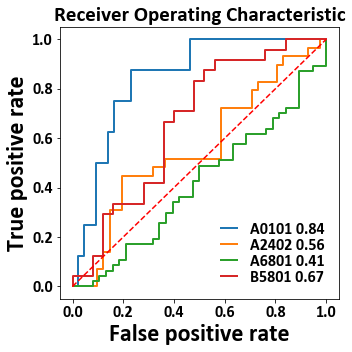

In [39]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
title_prop = font_manager.FontProperties(fname=font_path, size=21)
rf=open('prot_allele.list','r')
lines=rf.readlines()
#lines=['3bo8 A0101']
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(1,1,1)
for line in lines[:4]:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    data=np.loadtxt('%s30_roc%d.txt' %(pdbid,ave_num))
    score = data[:,0]
    y = data[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y,score)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2,label = '%s %0.2f' %(allele,roc_auc))
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
leg=plt.legend(loc='lower right', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic',fontproperties=title_prop)
plt.ylabel('True positive rate',fontproperties=font_prop)
plt.xlabel('False positive rate',fontproperties=font_prop)
plt.show()

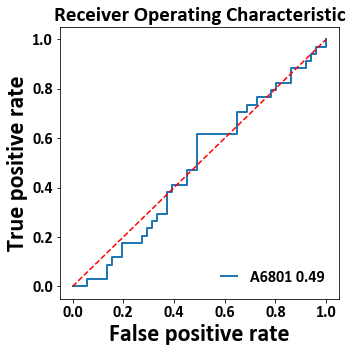

In [87]:
import shutil
shutil.copy('/scratch/gpfs/dongdong/MHC/rosetta/'+'aa','/scratch/gpfs/dongdong/MHC/rosetta/'+'cc')

'/scratch/gpfs/dongdong/MHC/rosetta/cc'

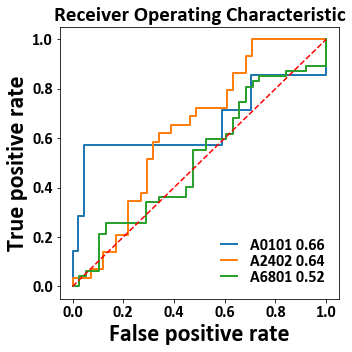

In [69]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
title_prop = font_manager.FontProperties(fname=font_path, size=21)
rf=open('prot_allele.list','r')
lines=rf.readlines()
#lines=['3bo8 A0101']
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(1,1,1)
for line in lines[:3]:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    data=np.loadtxt('%s_roc3.txt' %pdbid)
    score = data[:,0]
    y = data[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y,score)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2,label = '%s %0.2f' %(allele,roc_auc))
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
leg=plt.legend(loc='lower right', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic',fontproperties=title_prop)
plt.ylabel('True positive rate',fontproperties=font_prop)
plt.xlabel('False positive rate',fontproperties=font_prop)
plt.show()

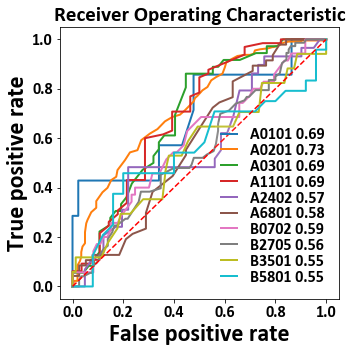

In [61]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
title_prop = font_manager.FontProperties(fname=font_path, size=21)
rf=open('prot_allele.list','r')
lines=rf.readlines()
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(1,1,1)
for line in lines:
    line=line.strip()
    pdbid=line.split()[0]
    allele=line.split()[1]
    data=np.loadtxt('%s_roc2.txt' %pdbid)
    score = data[:,0]
    y = data[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y,score)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2,label = '%s %0.2f' %(allele,roc_auc))
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
leg=plt.legend(loc='lower right', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic',fontproperties=title_prop)
plt.ylabel('True positive rate',fontproperties=font_prop)
plt.xlabel('False positive rate',fontproperties=font_prop)
plt.show()

In [53]:
metrics.roc_curve?

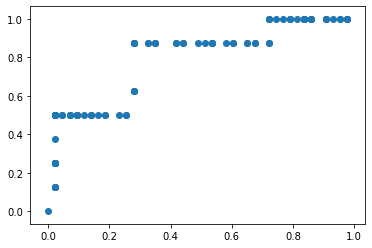

In [34]:
import matplotlib.pyplot as plt
import numpy as np
data=np.loadtxt('3bo85_roc3.txt')
score = data[:,0]
y = data[:,1]

# false positive rate
fpr = []
# true positive rate
tpr = []
# Iterate thresholds from 0.0, 0.01, ... 1.0
thresholds = np.arange(0.0, 1.01, .01)

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    for i in range(len(score)):
        if (score[i] > thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    fpr.append(FP/float(N))
    tpr.append(TP/float(P))

plt.scatter(fpr, tpr)
plt.show()

In [63]:
np.exp(1)

2.7182818284590451

In [ ]:
np